# 📢 **File explanation!!**
Exploratory Data Analysis (EDA) processing on this file is carried out with all data that has not been processed at all.

# 🎯 **Step 0: Import library**
---

In [1]:
!pip install imojify

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import json
import nltk
import re

from imojify import imojify
from collections import Counter
from wordcloud import WordCloud
from itertools import islice, chain
from nltk.tokenize import word_tokenize
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from sklearn.feature_extraction.text import CountVectorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 47.6 MB/s eta 0:00:00


In [2]:
nltk.download('punkt')
plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load dataset**
---

## ✨ 1.1 - Dataset tweet

In [4]:
path =  '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/df_tweet_after_preprocessing.csv'

df_sentiment = pd.read_csv(path)

df_sentiment.head()

,sentimen,tweet,clean_tweet,clean_tweet_sentence
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,"['kata', 'prabowo', 'indonesia', 'tidak', 'har...",kata prabowo indonesia tidak harga bangsa asin...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","['batu', 'langka', 'tasbih', 'jokowi', 'hadiah...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","['era', 'jokowi', 'ekonomi', 'indonesia', 'mak...",era jokowi ekonomi indonesia makin baik
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","['sumatera', 'selatan', 'asian', 'games', 'dam...",sumatera selatan asian games dampak ekonomi la...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,"['negara', 'hutang', 'buat', 'bangun', 'infras...",negara hutang buat bangun infrastruktur pakai ...


## ✨ 1.2 - Dataset slang words

In [5]:
def load_dataset_slang(path):

  with open(path, 'r') as file:

    slang_words = json.load(file)

  return slang_words


def print_data(data):

  for key, value in islice(data.items(), 5):

    print(key, value)

In [6]:
path = [
    '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/Slang Words/json_slang_words1',
    '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/Slang Words/json_slang_words2',
    '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/Slang Words/json_slang_words3'
]

slang_words1 = load_dataset_slang(path[0])

slang_words2 = load_dataset_slang(path[1])

slang_words3 = load_dataset_slang(path[2])

In [7]:
print_data(slang_words1)

@ di
abis habis
ad ada
adlh adalah
afaik as far as i know


In [8]:
print_data(slang_words2)

aamiin amin 
adek adik 
adlh adalah 
aer air 
aiskrim es krim 


In [9]:
print_data(slang_words3)

woww wow
aminn amin
met selamat
netaas menetas
keberpa keberapa


## ✨ 1.3 - Dataset emoji

In [10]:
path =  '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/df_emoji.csv'

df_emoji = pd.read_csv(path)

df_emoji.head()

,emoji-symbol,meaning,meaning-indo,emoji-unicode,emoji-name,emoji-name-indo
0,😄,smiley,tersenyum,ðŸ˜„,grinning face with smiling eyes,wajah menyeringai dengan mata tersenyum
1,😃,smiley,tersenyum,ðŸ˜ƒ,grinning face with big eyes,wajah menyeringai dengan mata besar
2,😀,smiley,tersenyum,ðŸ˜€,grinning face,wajah menyeringai
3,😊,smiley,tersenyum,ðŸ˜Š,smiling face with smiling eyes,wajah tersenyum dengan mata tersenyum
4,🙂,blush,memerah,â˜ºï¸,slightly smiling face,Wajah yang sedikit tersenyum


In [11]:
emoji_dict = dict(zip(df_emoji['emoji-unicode'], df_emoji['meaning-indo']))

print_data(emoji_dict)

ðŸ˜„ tersenyum
ðŸ˜ƒ tersenyum
ðŸ˜€ tersenyum
ðŸ˜Š tersenyum
â˜ºï¸ memerah


# 🎯 **Step 2: Check data info**

---



In [12]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sentimen              1815 non-null   object
 1   tweet                 1815 non-null   object
 2   clean_tweet           1815 non-null   object
 3   clean_tweet_sentence  1815 non-null   object
dtypes: object(4)
memory usage: 56.8+ KB


🚧 Based on the information above, it can be seen that the total distribution for each column is the same

# 🎯 **Step 3: Check the amount of data for each class in the sentiment column**

---



In [13]:
sentiment_counts = df_sentiment['sentimen'].value_counts(ascending=True)

sentiment_counts

negatif    596
netral     607
positif    612
Name: sentimen, dtype: int64

<ipython-input-14-477122f33346>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='magma')


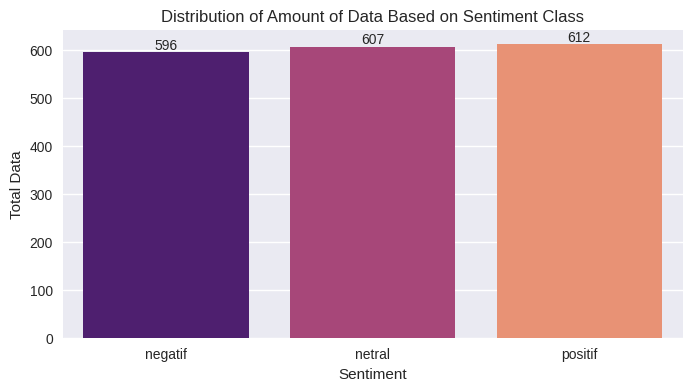

In [14]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Sentiment')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Sentiment Class')

plt.show()

🚧 Based on the information above, it can be seen that the amount of data for each class is not very different so I will not apply oversampling or undersampling.

# 🎯 **Step 4: Check tweet length**

---



🔎 In stage 5, I checked the length of the tweets for each class by dividing the text based on spaces and entering the results in a new column, namely tweet_length (feature engineering) according to each data

## ✨ 5.1 - Barplot

In [33]:
df_sentiment['tweet_length'] = df_sentiment['clean_tweet_sentence'].str.split(' ').apply(len)

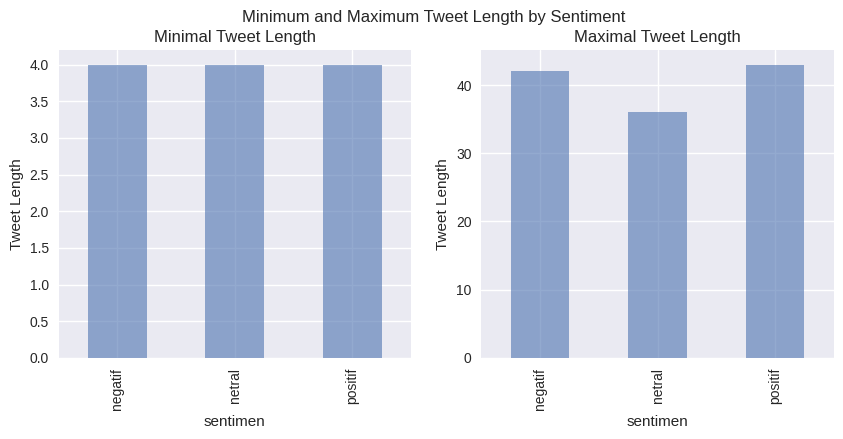

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Minimum and Maximum Tweet Length by Sentiment')


df_sentiment.groupby('sentimen')['tweet_length'].min().plot(kind='bar', ax=axes[0], alpha=0.6)

axes[0].set_title('Minimal Tweet Length')

axes[0].set_ylabel('Tweet Length')


df_sentiment.groupby('sentimen')['tweet_length'].max().plot(kind='bar', ax=axes[1], alpha=0.6)

axes[1].set_title('Maximal Tweet Length')

axes[1].set_ylabel('Tweet Length')

plt.show()

🚧 Based on the information in graph 5.1 it can be seen as follows:

- The classes that have the shortest tweets are all classes around 3 words and this is slightly different from EDA before preprocessing on file 01. Before preprocessing, the shortest tweets are the negative and positive classes around 5 words
- The class that has the longest tweet is the positive class and this is different before preprocessing. Before preprocessing, the longest tweet is of the neutral class

**However, there is something interesting when visualized with a boxplot**

## ✨ 5.2 - Boxplot

In [17]:
distribution = df_sentiment[['sentimen', 'tweet_length']]

<ipython-input-18-2ff4cf4dfc02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='sentimen', y='tweet_length', data=distribution, palette='rocket')


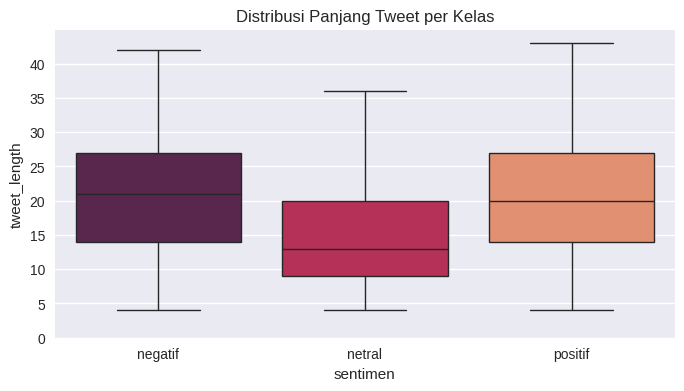

In [18]:
plt.figure(figsize=(8, 4))

ax = sns.boxplot(x='sentimen', y='tweet_length', data=distribution, palette='rocket')

plt.title('Distribusi Panjang Tweet per Kelas')

plt.yticks(range(0, max(df_sentiment['tweet_length']) + 1, 5))

plt.show()


🚧 Based on the information in graph 5.2 it can be seen as follows:

- There are differences regarding graphs 5.2 and 5.1 on the right. In 5.1 on the right you can see that the longest tweet is in the positive class, but in 5.2 there are outliers in the positive class which cause this.
- There is further information that the neutral and positive classes have outliers and this is different from graph 5.2 before preprocessing where when visualized there are no outliers at all in these 2 classes

# 🎯 **Step 5: Check the words unigram, bigram, trigrams that often appear**

---


🔎 At this stage I used the `CountVectorizer` library from Sklearn to calculate the frequency of occurrence of words from unigrams, bigrams and trigrams. Then I filter to display the top 20 words that have the most occurrences

In [19]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Word': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    for i, plot_info in enumerate(plot_data):

        row = i // 2

        col = i % 2

        ax = axes[row, col]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'])

    plt.tight_layout()

    plt.show()

In [20]:
df_positive = df_sentiment[df_sentiment['sentimen'] == 'positif']

df_neutral = df_sentiment[df_sentiment['sentimen'] == 'netral']

df_negative = df_sentiment[df_sentiment['sentimen'] == 'negatif']

## ✨ 6.1 - Unigram

In [21]:
stop_words = None

n = 7

unigram = get_top_ngrams(df_sentiment['clean_tweet_sentence'], (1, 1), stop_words, n)

unigram_positive = get_top_ngrams(df_positive['clean_tweet_sentence'], (1, 1), stop_words, n)

unigram_neutral = get_top_ngrams(df_neutral['clean_tweet_sentence'], (1, 1), stop_words, n)

unigram_negative = get_top_ngrams(df_negative['clean_tweet_sentence'], (1, 1), stop_words, n)


🚧 The output results from the code above are as follows

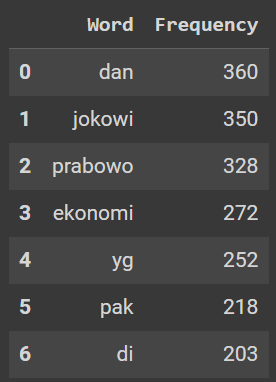

<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without 

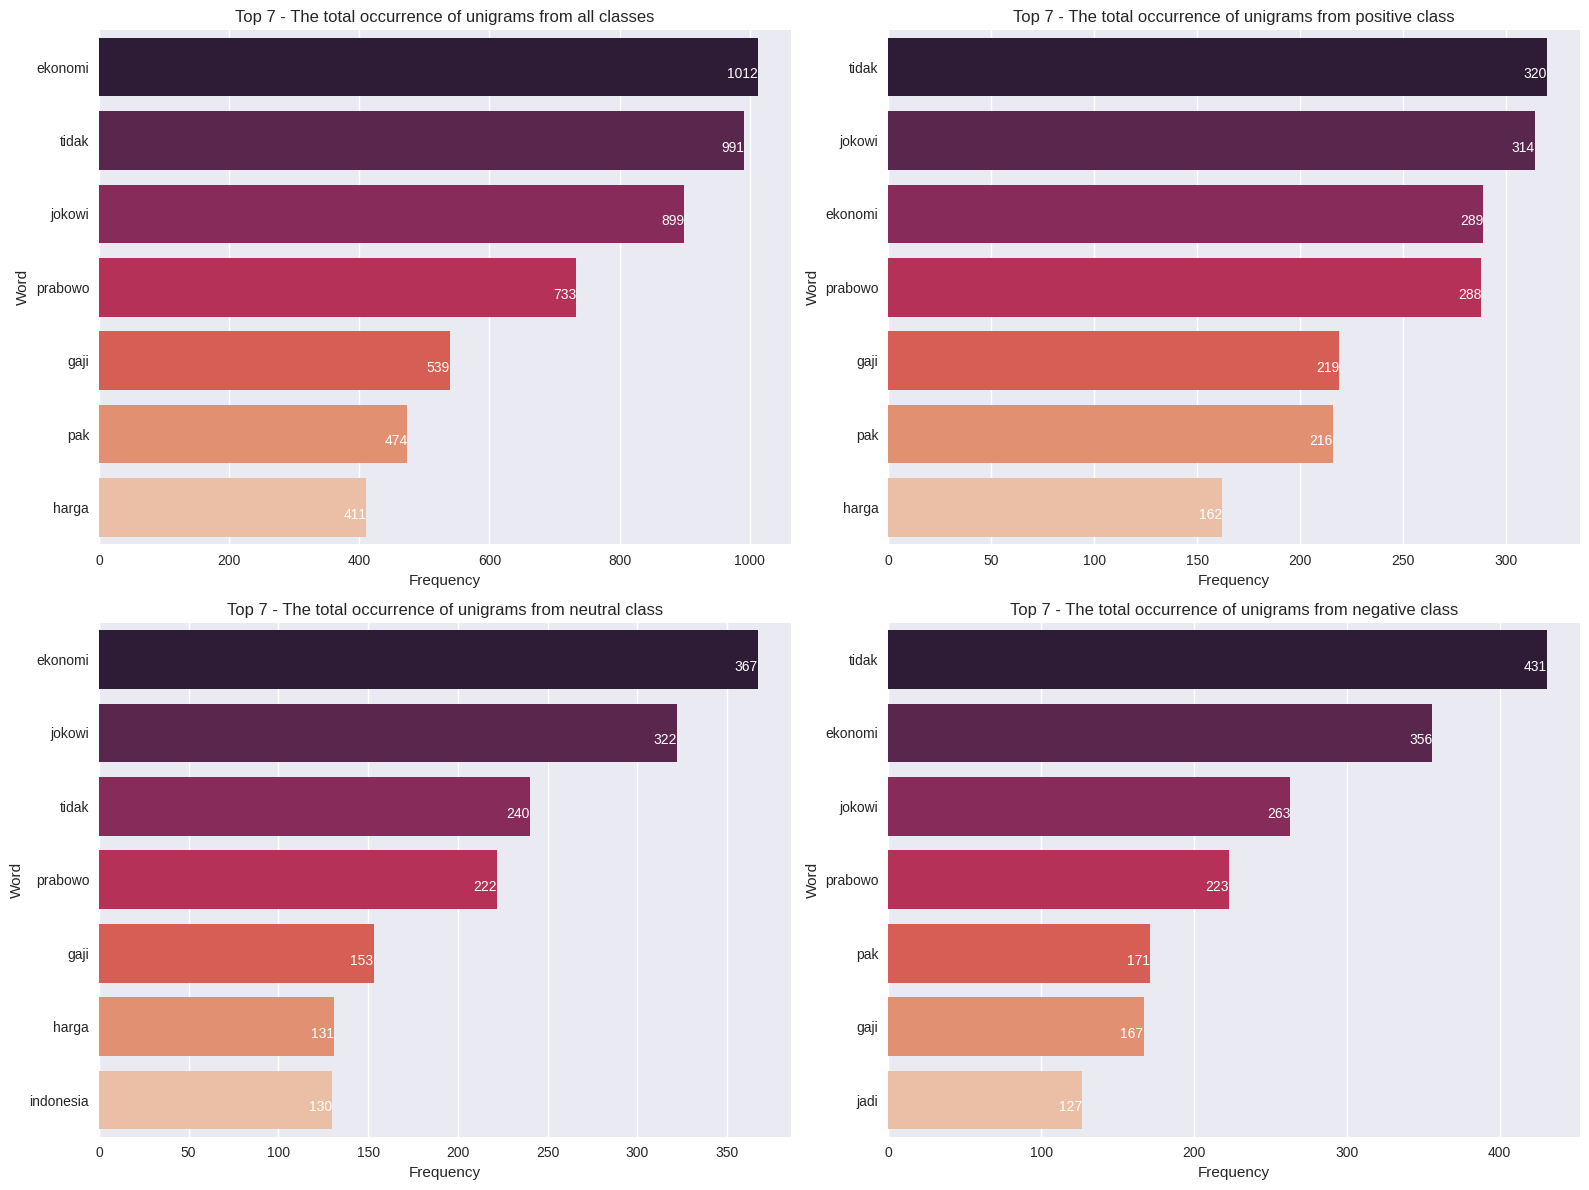

In [22]:
plot_data = [

    {'data': unigram, 'title': 'Top 7 - The total occurrence of unigrams from all classes'},

    {'data': unigram_positive, 'title': 'Top 7 - The total occurrence of unigrams from positive class'},

    {'data': unigram_neutral, 'title': 'Top 7 - The total occurrence of unigrams from neutral class'},

    {'data': unigram_negative, 'title': 'Top 7 - The total occurrence of unigrams from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the graphic description above, it can be observed that in the top three categories, the most dominant words are always related to economic topics, and tidak. This is different from the conditions before preprocessing, where the top three words in each category always varied.

## ✨ 6.2 - Bigram

In [23]:
bigram = get_top_ngrams(df_sentiment['clean_tweet_sentence'], (2, 2), stop_words, n)

bigram_positive = get_top_ngrams(df_positive['clean_tweet_sentence'], (2, 2), stop_words, n)

bigram_neutral = get_top_ngrams(df_neutral['clean_tweet_sentence'], (2, 2), stop_words, n)

bigram_negative = get_top_ngrams(df_negative['clean_tweet_sentence'], (2, 2), stop_words, n)


<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without 

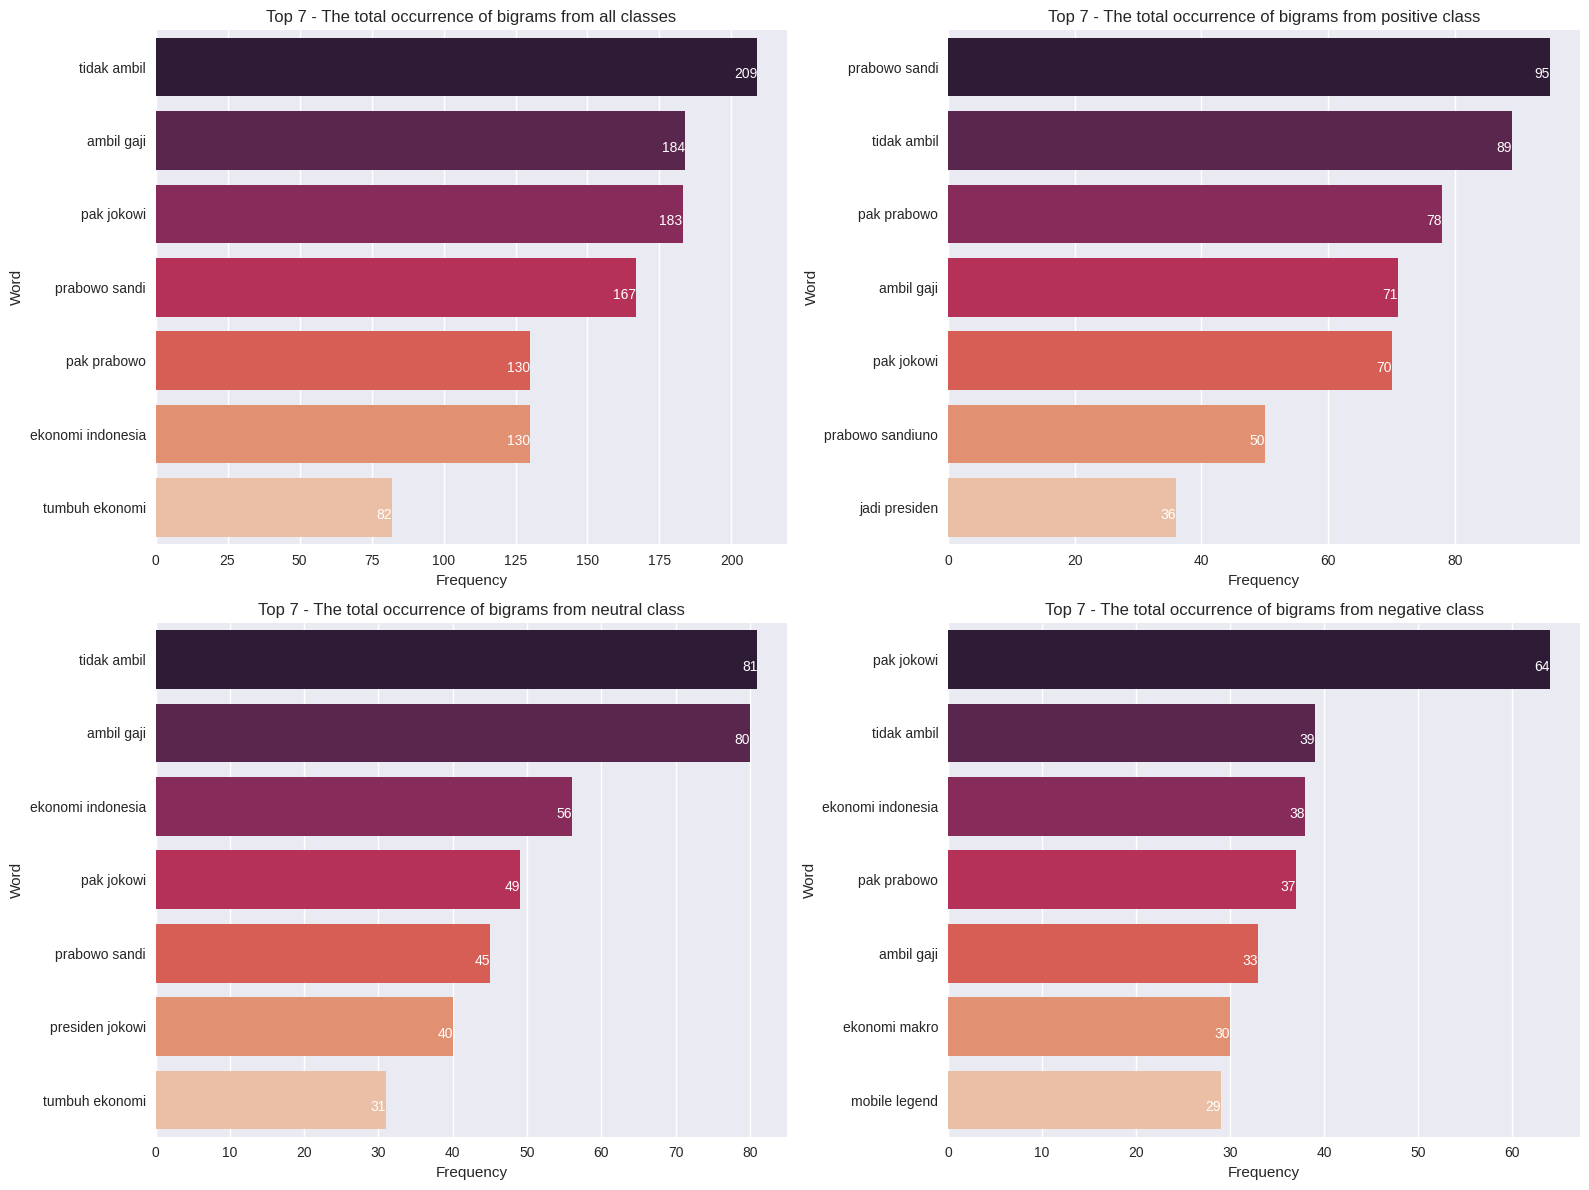

In [24]:
plot_data = [

    {'data': bigram, 'title': 'Top 7 - The total occurrence of bigrams from all classes'},

    {'data': bigram_positive, 'title': 'Top 7 - The total occurrence of bigrams from positive class'},

    {'data': bigram_neutral, 'title': 'Top 7 - The total occurrence of bigrams from neutral class'},

    {'data': bigram_negative, 'title': 'Top 7 - The total occurrence of bigrams from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the graphical representation above, it can be observed that the bigram 'tidak ambil' is always in the top 3 of each class. Apart from that, it can also be observed before and after preprocessing in the positive class, the first top is still the bigram 'prabowo Sandi'.

## ✨ 6.3 - Trigram

In [25]:
trigram = get_top_ngrams(df_sentiment['clean_tweet_sentence'], (3, 3), stop_words, n)

trigram_positive = get_top_ngrams(df_positive['clean_tweet_sentence'], (3, 3), stop_words, n)

trigram_neutral = get_top_ngrams(df_neutral['clean_tweet_sentence'], (3, 3), stop_words, n)

trigram_negative = get_top_ngrams(df_negative['clean_tweet_sentence'], (3, 3), stop_words, n)


<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)
<ipython-input-19-7484aaa638b6>:29: FutureWarning: 

Passing `palette` without 

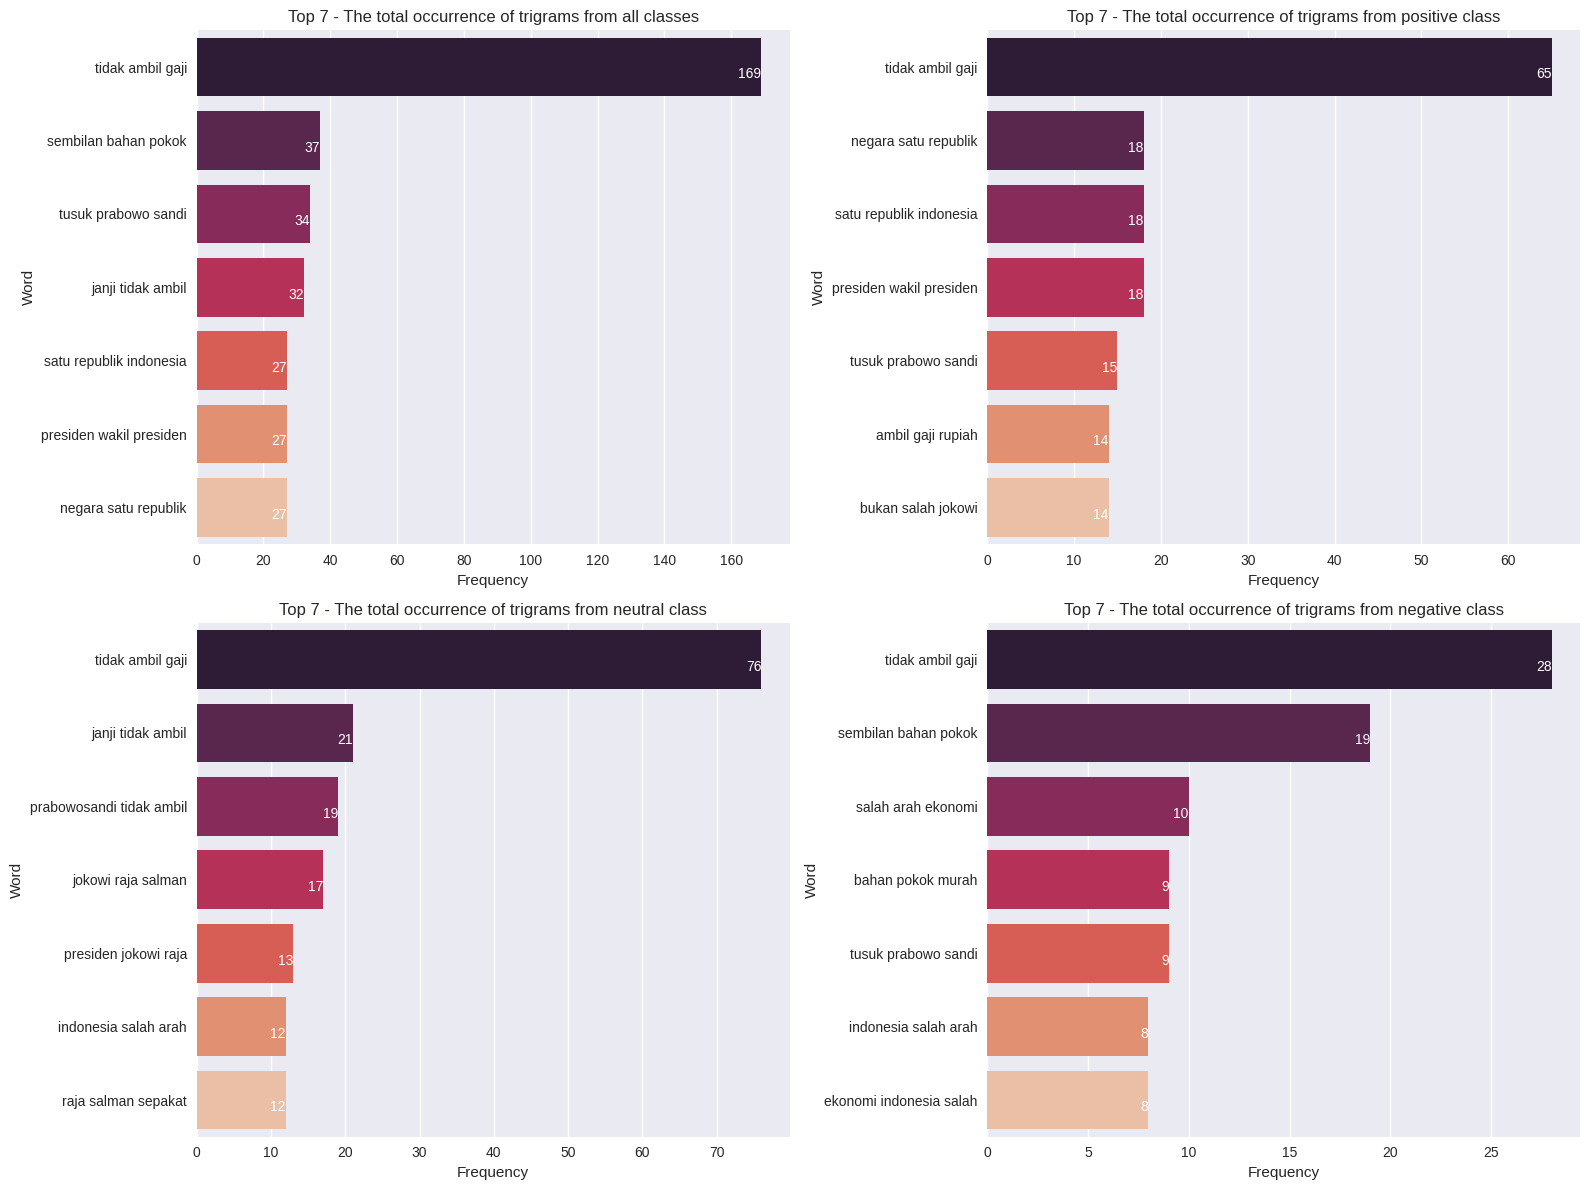

In [26]:
plot_data = [

    {'data': trigram, 'title': 'Top 7 - The total occurrence of trigrams from all classes'},

    {'data': trigram_positive, 'title': 'Top 7 - The total occurrence of trigrams from positive class'},

    {'data': trigram_neutral, 'title': 'Top 7 - The total occurrence of trigrams from neutral class'},

    {'data': trigram_negative, 'title': 'Top 7 - The total occurrence of trigrams from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the graphical representation above, it can be seen that the top 3 for each class are different and none of them shows the trigram in the same position, except for the 'tidak ambil gaji' trigram. This is very different before preprocessing where the majority of the top 3 are dominated by 'pic twitter com', 'https twitter com', and emoji (in unicode form).

# 🎯 **Step 6: Check the wordcloud**

---


🔎 At this stage I display a wordcloud from each class of course with additions from all classes

In [27]:
def create_wordcloud(palette, data_target):

    sentiment_data = ' '.join(data_target)

    wordcloud = WordCloud(background_color='black', colormap=palette, collocations=False).generate(sentiment_data)

    return wordcloud

def plot_wordcloud(plot_data):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

    for i, plot_info in enumerate(plot_data):

        row = i // 2

        col = i % 2

        ax = axes[row, col]

        ax.imshow(plot_info['data'], interpolation='bilinear')

        ax.axis("off")

        ax.set_title(plot_info['title'], fontsize=28)

    plt.tight_layout()

    plt.show()

In [28]:
wordcloud_all = create_wordcloud('rocket', df_sentiment['clean_tweet_sentence'])

wordcloud_positive = create_wordcloud('Greens', df_positive['clean_tweet_sentence'])

wordcloud_neutral = create_wordcloud('Blues', df_neutral['clean_tweet_sentence'])

wordcloud_negative = create_wordcloud('Reds', df_negative['clean_tweet_sentence'])

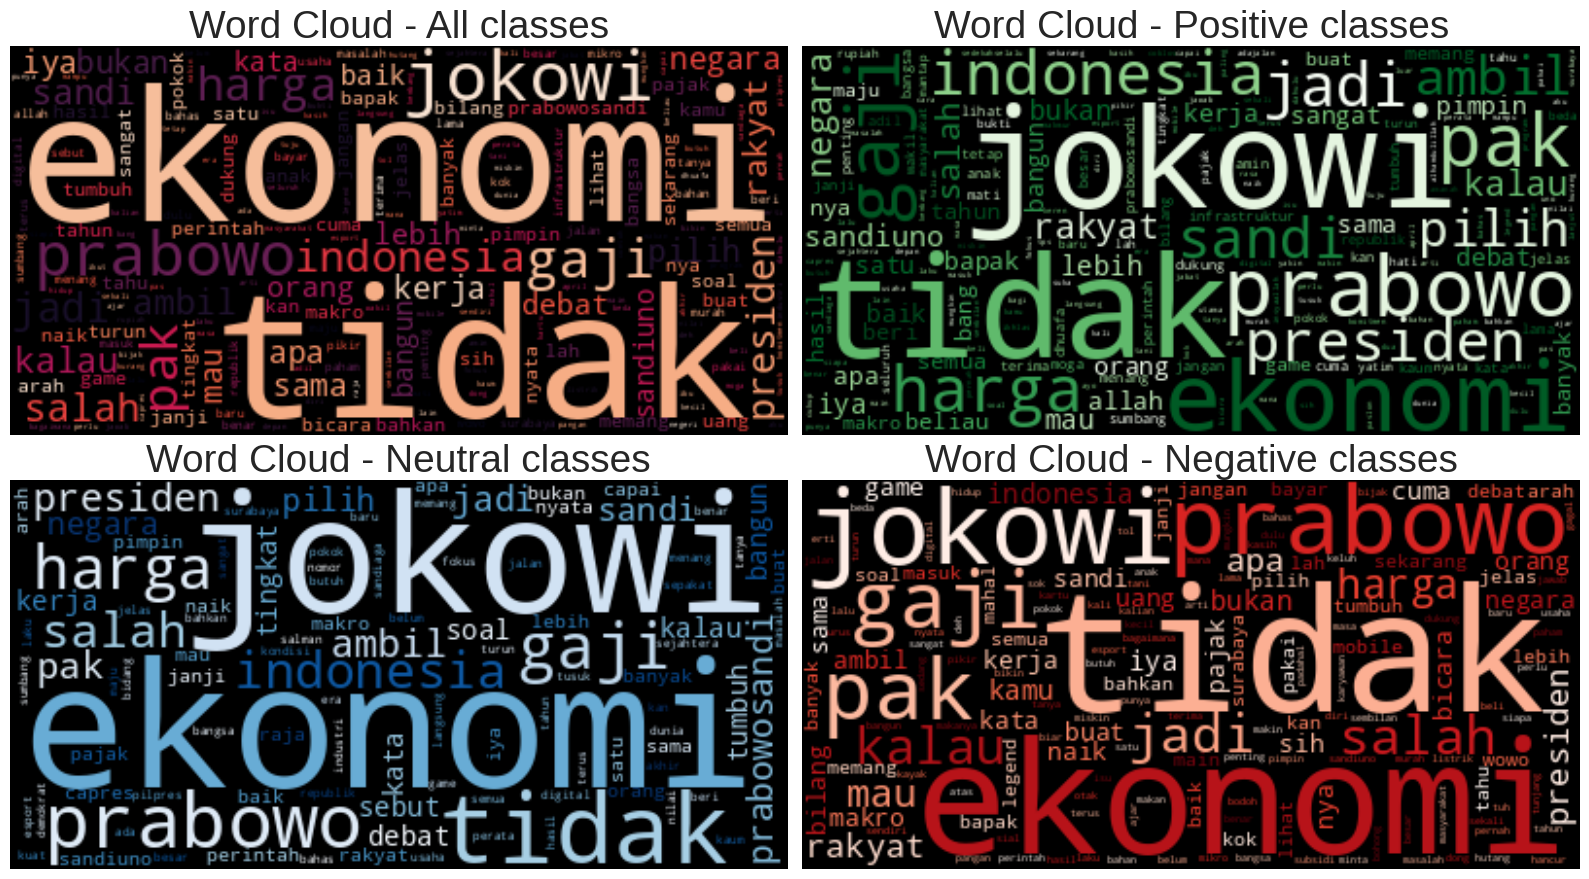

In [29]:
# Contoh penggunaan
plot_data = [

    {'data': wordcloud_all , 'title': 'Word Cloud - All classes'},

    {'data': wordcloud_positive, 'title': 'Word Cloud - Positive classes'},

    {'data': wordcloud_neutral, 'title': 'Word Cloud - Neutral classes'},

    {'data': wordcloud_negative, 'title': 'Word Cloud - Negative classes'}
]

plot_wordcloud(plot_data)

🚧 Based on the graphic representation above, it can be seen that the top 3 of each class always contain the words 'jokowi', 'ekonomi', and 'prabowo'. Before preprocessing the positive class has the word 'dan' as the top 3 as well as the negative class which has the word 'yang'

# ✅ **Conclusion**

---

After preprocessing, a number of graphs are visible whose visualization is quite different from before preprocessing.

When I ran file 03 for the first time, I found that there were still slang words and abbreviations that had not been changed. Therefore, I added some slang words and abbreviations that I thought needed to be changed according to the slang dataset.

I also found that there were still many words that had not been properly tokenized so I decided as follows:
- comma, hyphen (-), slash (/) become spaces
- comment on the remove_duplicate_letters function in file 02 because a lot of data is out of context when applying this function

Then I re-ran it again from file 00